# Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

pd.options.display.max_columns = None

# Get data

In [3]:
df = pd.read_csv(r"../data/processed/processed.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.index=df['Date']
df.drop(columns=['Date'], inplace=True)
df.dropna(inplace=True)
display(df)

,BDRX_Close,DowJones_Close,Gold_Close,Ibovespa_Close,ICON_Close,IEE_Close,IFIX_Close,IFNC_Close,IGCNM_Close,IGCX_Close,IMAT_Close,IMOB_Close,INDX_Close,IVBX2_Close,Nasdaq_Close,S&P_Close,selic_Close,SMAL11-ETF_Close,USDBRL_Close,UTIL_Close,Vix_Close
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-02,874.004867,15658.360352,1310.599976,21064.661916,1019.090040,11154.167391,616.426212,1700.404137,700.812620,3212.358769,678.545976,311.024683,5091.395793,2881.066468,3689.590088,1709.670044,8.40,27.889797,2.30120,1136.272380,11.980000
2013-08-05,885.485989,15612.129883,1302.599976,21206.654991,1024.522767,11305.849387,622.543783,1687.985989,702.924694,3228.625219,684.474606,312.373030,5120.718039,2905.302085,3692.949951,1707.140015,8.40,28.099825,2.28400,1151.090193,11.840000
2013-08-06,874.633024,15518.740234,1283.199951,20594.979588,1003.734908,11012.672631,613.185095,1633.566403,687.470685,3148.015287,668.274993,302.088943,4996.538695,2831.103927,3665.770020,1697.369995,8.40,27.408148,2.30260,1123.529923,12.720000
2013-08-07,875.670965,15470.669922,1286.099976,20672.272569,1001.167654,11138.929069,614.077205,1636.219066,685.761589,3152.866853,681.147612,300.365981,5011.323632,2833.143030,3654.010010,1690.910034,8.40,27.269955,2.29520,1136.842105,12.980000
2013-08-08,868.655874,15498.320313,1310.699951,21235.623454,1013.888286,11264.537129,610.429235,1677.409835,695.312703,3207.582136,694.774532,305.507573,5084.805347,2877.700519,3669.120117,1697.479980,8.40,27.741851,2.30410,1144.012847,12.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,1899.634736,26584.769531,1957.800049,19979.920063,961.685567,14550.746782,520.695722,2142.705246,733.558356,3225.073148,706.599606,197.418294,3795.547991,2811.416819,10536.269531,3239.409912,2.15,22.472319,5.22910,1608.976688,24.740000
2020-07-28,1911.434973,26379.279297,1950.199951,20249.075158,987.873000,14676.618522,529.563817,2160.037499,745.249367,3268.914035,713.094826,200.938651,3846.559900,2870.660154,10402.089844,3218.439941,2.15,23.087007,5.14142,1624.144692,25.440001
2020-07-29,1936.034392,26539.570313,1958.699951,20496.671389,997.193486,14685.769462,528.548415,2191.083594,752.436776,3306.172001,723.255633,205.420880,3883.436523,2893.059441,10542.940430,3258.439941,2.15,23.253692,5.15230,1619.651418,24.100000


In [4]:
df.columns

Index(['BDRX_Close', 'DowJones_Close', 'Gold_Close', 'Ibovespa_Close',
       'ICON_Close', 'IEE_Close', 'IFIX_Close', 'IFNC_Close', 'IGCNM_Close',
       'IGCX_Close', 'IMAT_Close', 'IMOB_Close', 'INDX_Close', 'IVBX2_Close',
       'Nasdaq_Close', 'S&P_Close', 'selic_Close', 'SMAL11-ETF_Close',
       'USDBRL_Close', 'UTIL_Close', 'Vix_Close'],
      dtype='object')

In [5]:
df = df[['DowJones_Close', 'Gold_Close', 'Ibovespa_Close',
       'IFIX_Close','S&P_Close','USDBRL_Close','selic_Close']]

# Calculate returns

In [6]:
#df = df/df.shift(1)
df = df.groupby(df.index.year).max()/df.groupby(df.index.year).max().shift(1)
df['selic_Close'] = df['selic_Close']**(1/365)

# Create dataframe with portfolios

## Number of portfolios

In [7]:
num_port = 100000

## Creates dataframe with random values and normalizes rows to sum 1

In [8]:
df_port = pd.DataFrame(columns=list(df.columns),
                       data = np.random.uniform(size=(num_port, len(df.columns))))

In [9]:
df_port = df_port.div(df_port.sum(axis=1), axis=0)

## Calculates metrics per portfolio
- Returns as sum of returns times weight
- Volatilty
- Sharpe Ratio

In [10]:
def calc_risk(row):
    risk = np.sqrt(np.dot(row.T,np.dot(df.cov()*252, row)))
    return risk

In [11]:
vol = df_port.apply(calc_risk,axis=1)

In [12]:
ret = (df.describe().loc['mean'] * df_port).sum(axis=1)

In [13]:
df_port['Volatility'] = vol
df_port['Returns'] =  ret
df_port['Sharpe'] = ret/vol

In [14]:
df_port

,DowJones_Close,Gold_Close,Ibovespa_Close,IFIX_Close,S&P_Close,USDBRL_Close,selic_Close,Volatility,Returns,Sharpe
0,0.123774,0.314181,0.241901,0.197838,0.051559,0.051551,0.019195,1.165790,1.055354,0.905269
1,0.205711,0.142761,0.168163,0.004889,0.230347,0.197700,0.050429,0.493141,1.083432,2.197003
2,0.071889,0.072513,0.120289,0.207475,0.170780,0.115144,0.241910,0.510647,1.055000,2.066006
3,0.050667,0.106113,0.133070,0.165654,0.285191,0.072525,0.186780,0.665576,1.057745,1.589217
4,0.174419,0.013676,0.178874,0.050206,0.019153,0.279371,0.284302,0.588992,1.068712,1.814477
...,...,...,...,...,...,...,...,...,...,...
99995,0.135950,0.008130,0.104038,0.150354,0.254968,0.234175,0.112385,0.356000,1.081035,3.036614
99996,0.015927,0.121538,0.209681,0.303848,0.106741,0.092211,0.150054,0.900162,1.049359,1.165744
99997,0.135150,0.156458,0.220252,0.160065,0.072490,0.147035,0.108551,0.691072,1.062508,1.537476
99998,0.179941,0.232925,0.151528,0.101240,0.066268,0.000718,0.267380,0.893228,1.043067,1.167750


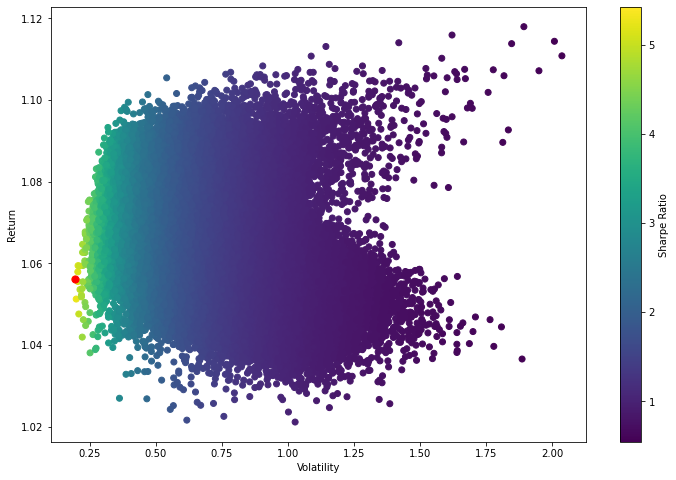

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(df_port['Volatility'], df_port['Returns'] , c=df_port['Sharpe'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(df_port.loc[df_port['Sharpe'] == df_port['Sharpe'].max(), 'Volatility'], df_port.loc[df_port['Sharpe'] == df_port['Sharpe'].max(), 'Returns'],c='red', s=50) # red dot
plt.show()